# Movie Genre Data Analysis

## Introduction
We are going to focus highly on genres. I want to know everything about genres.

Here are some things I want to look at:

### **Research Questions (Q):**
1. Which genres are the most common (number of movies made)?
2. Which genres have high avg. budget and revenue?
3. Which genres have high avg. profit?
4. Which genres have high avg. popularity?
5. Which genres have the highest number of movies with a voting avg. >= 8?

### **Research Hypotheses (H):**
1. The best movies according to vote avg. return high profit.
2. The best movies according to popularity return high profit.
3. Highly budgeted movies return high profit.
4. Highly budgeted movies have a high popularity.

### **Bonus Question (B):**
1. Take a look at the profit per genre per year, to see if there's an evolution over the years.



In [3]:
import pandas as pd

In [5]:
movies = pd.read_csv(r"C:\Users\User\OneDrive\Documents\Data analyst bootcamp\Pandas\Projects\Movie Genres Data Analysis Project\imdb_movies.csv")
movies.head

<bound method NDFrame.head of            id    imdb_id  popularity     budget     revenue  \
0      135397  tt0369610   32.985763  150000000  1513528810   
1       76341  tt1392190   28.419936  150000000   378436354   
2      262500  tt2908446   13.112507  110000000   295238201   
3      140607  tt2488496   11.173104  200000000  2068178225   
4      168259  tt2820852    9.335014  190000000  1506249360   
...       ...        ...         ...        ...         ...   
10861      21  tt0060371    0.080598          0           0   
10862   20379  tt0060472    0.065543          0           0   
10863   39768  tt0060161    0.065141          0           0   
10864   21449  tt0061177    0.064317          0           0   
10865   22293  tt0060666    0.035919      19000           0   

                     original_title  \
0                    Jurassic World   
1                Mad Max: Fury Road   
2                         Insurgent   
3      Star Wars: The Force Awakens   
4                 

In [8]:
#Let's figure out how many lines there are: 
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [10]:
pd.set_option("display.max.rows",11000)
pd.set_option("display.max.columns",22)

#We do this so that Pandas won't truncate the last lines

In [12]:
movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [15]:
#DATA CLEANING AND SHAPING:

In [17]:
#We need to identify the duplicates:
movies[movies.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [19]:
#We need to remove this row:
movies.drop_duplicates(inplace = True)

In [21]:
#Let's check if it worked:
movies[movies.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [23]:
#Like said before, we are focusing mostly on genres. This column needs be populated for each row.
#So we have to delete the rows where the column "genres" is empty

In [25]:
movies.dropna(subset = ["genres"], inplace = True)

In [27]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10842 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10842 non-null  int64  
 1   imdb_id               10834 non-null  object 
 2   popularity            10842 non-null  float64
 3   budget                10842 non-null  int64  
 4   revenue               10842 non-null  int64  
 5   original_title        10842 non-null  object 
 6   cast                  10767 non-null  object 
 7   homepage              2931 non-null   object 
 8   director              10800 non-null  object 
 9   tagline               8036 non-null   object 
 10  keywords              9367 non-null   object 
 11  overview              10839 non-null  object 
 12  runtime               10842 non-null  int64  
 13  genres                10842 non-null  object 
 14  production_companies  9826 non-null   object 
 15  release_date          10

In [29]:
#we went from 10866 movies to 10842.

In [32]:
#Let's create a profit column:
movies["profit"] = movies["revenue"] - movies["budget"]

In [34]:
movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,185238201
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1868178225
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1316249360


In [52]:
#We should only keep the necessary columns so that we use less space.

In [54]:
movies_genre = movies[["popularity","budget","revenue", "original_title","runtime","genres","release_date","vote_count","vote_average","profit"]]

In [56]:
movies_genre.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,profit
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,228436354
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,1868178225
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,1316249360


In [59]:
from pandas import Series, DataFrame
movies_genre["genres"].str.split("|").apply(Series,1).stack()

C:\Users\User\AppData\Local\Temp\ipykernel_1896\3855198531.py:2: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  movies_genre["genres"].str.split("|").apply(Series,1).stack()


0      0             Action
       1          Adventure
       2    Science Fiction
       3           Thriller
1      0             Action
                 ...       
10863  0            Mystery
       1             Comedy
10864  0             Action
       1             Comedy
10865  0             Horror
Length: 26955, dtype: object

In [61]:
#This code takes the genres column, splits the genres strings (separated by |) into individual genres, and creates a new row for each genre per movie.
#So now, each genre is listed separately in its own row.

In [63]:
split = movies_genre["genres"].str.split("|").apply(Series,1).stack()

C:\Users\User\AppData\Local\Temp\ipykernel_1896\458558261.py:1: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  split = movies_genre["genres"].str.split("|").apply(Series,1).stack()


In [65]:
#let's assign every genre of the same movie to a single index:
split.index = split.index.droplevel(-1)
split

0                 Action
0              Adventure
0        Science Fiction
0               Thriller
1                 Action
              ...       
10863            Mystery
10863             Comedy
10864             Action
10864             Comedy
10865             Horror
Length: 26955, dtype: object

In [68]:
#Let's replace the old "genres" column with the new one:
split.name = "genres_split"
del movies_genre["genres"]
movies_genre = movies_genre.join(split)

In [70]:
movies_genre.head(20)

,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,profit,genres_split
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.5,1363528810,Action
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.5,1363528810,Adventure
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.5,1363528810,Science Fiction
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.5,1363528810,Thriller
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,5/13/15,6185,7.1,228436354,Action
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,5/13/15,6185,7.1,228436354,Adventure
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,5/13/15,6185,7.1,228436354,Science Fiction
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,5/13/15,6185,7.1,228436354,Thriller
2,13.112507,110000000,295238201,Insurgent,119,3/18/15,2480,6.3,185238201,Adventure
2,13.112507,110000000,295238201,Insurgent,119,3/18/15,2480,6.3,185238201,Science Fiction


In [74]:
#1. Which genres are the most common (number of movies made)?

In [76]:
movies_common = movies_genre.groupby("genres_split")["original_title"].count().sort_values(ascending = False)

In [78]:
movies_common

genres_split
Drama              4760
Comedy             3793
Thriller           2907
Action             2384
Romance            1712
Horror             1637
Adventure          1471
Crime              1354
Family             1231
Science Fiction    1229
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
Name: original_title, dtype: int64

In [81]:
movies_common.reset_index()

,genres_split,original_title
0,Drama,4760
1,Comedy,3793
2,Thriller,2907
3,Action,2384
4,Romance,1712
5,Horror,1637
6,Adventure,1471
7,Crime,1354
8,Family,1231
9,Science Fiction,1229


In [83]:
genres_count = movies_common.reset_index()

In [85]:
#Let's visualize this data:

<Axes: title={'center': 'Count of Movies Per Genre'}, ylabel='genres_split'>

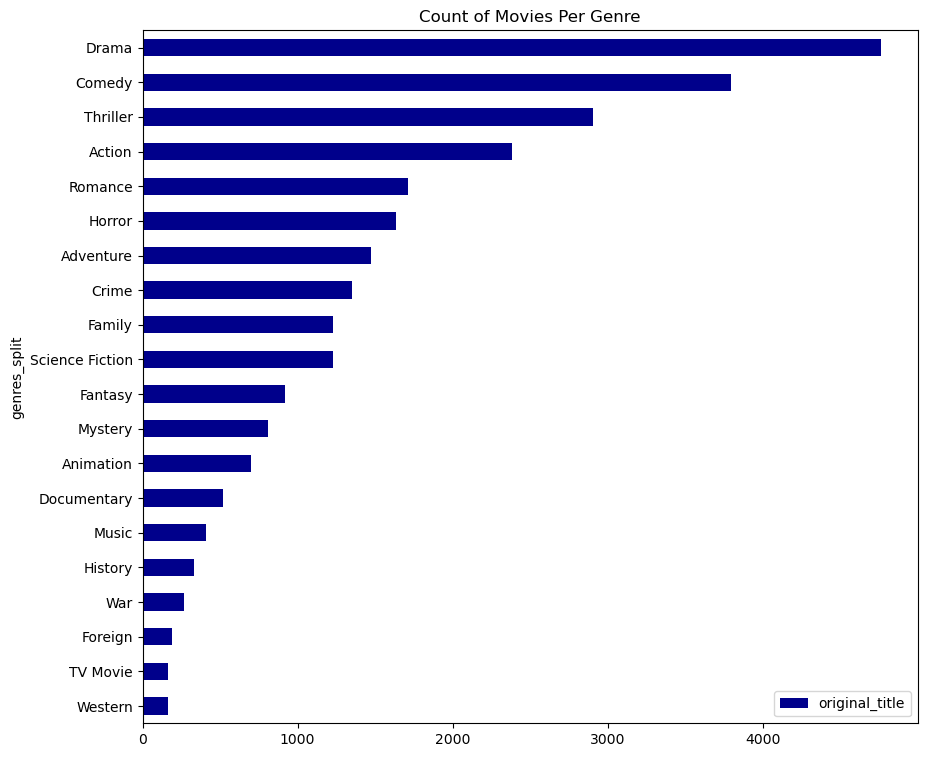

In [87]:
genres_count.sort_values(by='original_title', ascending=True).plot.barh(x='genres_split', y='original_title', title="Count of Movies Per Genre", color = "DarkBlue",figsize=(10, 9))

In [89]:
#2. Which genres have high avg. budget and revenue?

In [91]:
genres_avg_budget_revenue = movies_genre.groupby("genres_split")[["budget","revenue"]].mean().sort_values(by = "revenue", ascending = True)

In [93]:
pd.options.display.float_format = "{:2f}".format
genres_avg_budget_revenue = genres_avg_budget_revenue.reset_index()

In [95]:
genres_avg_budget_revenue

,genres_split,budget,revenue
0,TV Movie,267664.670659,251497.005988
1,Foreign,1451434.925532,1520459.835106
2,Documentary,577149.148077,2041106.994231
3,Horror,6226529.210751,16822808.624313
4,Western,18974107.975758,28568709.284848
5,Music,9438627.549020,28571768.691176
6,Drama,11880717.773529,29232255.725840
7,History,18594919.302395,32011793.215569
8,Romance,12531271.847547,35691972.327103
9,Comedy,13297915.618244,37526242.072238


In [97]:
#Visualization:

<Axes: title={'center': 'Budget & Revenue Per Genre'}, ylabel='genres_split'>

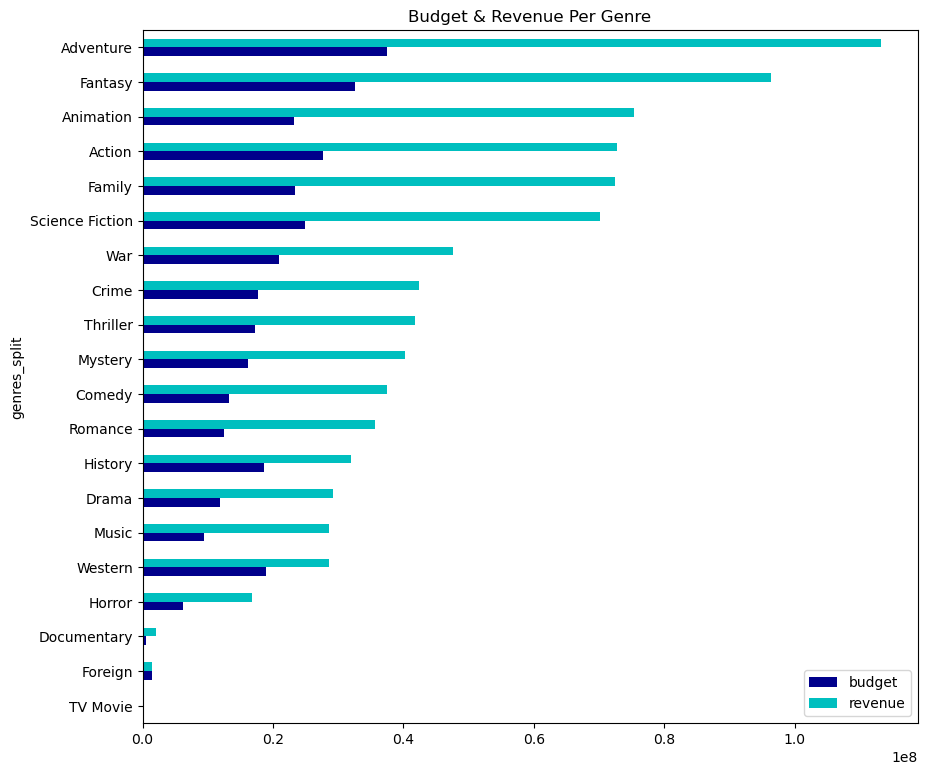

In [99]:
genres_avg_budget_revenue[["genres_split","budget","revenue"]].plot.barh(x = "genres_split",title="Budget & Revenue Per Genre", color = ("DarkBlue","c"),figsize=(10, 9))

In [103]:
#3. Which genres have high avg. profit?

In [105]:
profit_avg = movies_genre.groupby("genres_split")["profit"].mean().sort_values(ascending = True)
profit_avg

genres_split
TV Movie            -16167.664671
Foreign              69024.909574
Documentary        1463957.846154
Western            9594601.309091
Horror            10596279.413561
History           13416873.913174
Drama             17351537.952311
Music             19133141.142157
Romance           23160700.479556
Mystery           24098296.598765
Comedy            24228326.453994
Thriller          24520723.774682
Crime             24704860.520679
War               26713297.196296
Action            45066911.671141
Science Fiction   45167877.510171
Family            49073838.952884
Animation         52096280.616595
Fantasy           63701071.733624
Adventure         75594166.538409
Name: profit, dtype: float64

In [107]:
profit_avg = profit_avg.reset_index()
profit_avg

,genres_split,profit
0,TV Movie,-16167.664671
1,Foreign,69024.909574
2,Documentary,1463957.846154
3,Western,9594601.309091
4,Horror,10596279.413561
5,History,13416873.913174
6,Drama,17351537.952311
7,Music,19133141.142157
8,Romance,23160700.479556
9,Mystery,24098296.598765


In [111]:
#Vizualization:

<Axes: title={'center': 'Profit Per Genre'}, ylabel='genres_split'>

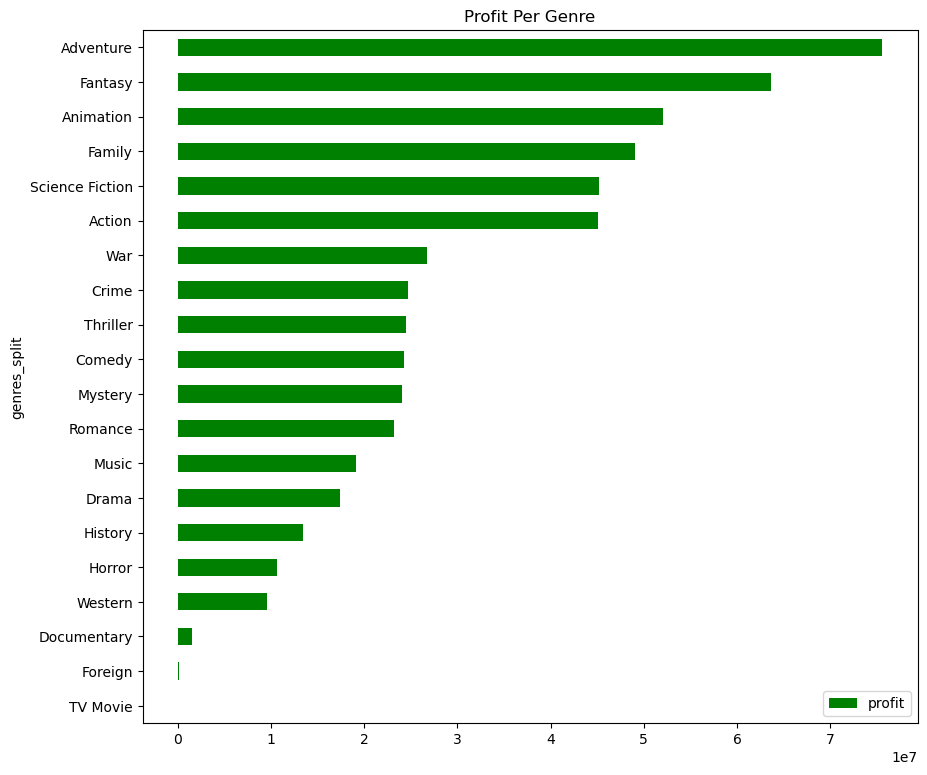

In [113]:
profit_avg[["genres_split", "profit"]].plot.barh(x="genres_split", title="Profit Per Genre", color="Green", figsize=(10, 9))

In [117]:
#4. Which genres have high avg. popularity?

In [119]:
popularity_avg = movies_genre.groupby("genres_split")["popularity"].mean().sort_values(ascending = True)
popularity_avg = popularity_avg.reset_index()
popularity_avg

,genres_split,popularity
0,Documentary,0.181432
1,Foreign,0.191496
2,TV Movie,0.270896
3,Horror,0.465357
4,Music,0.487321
5,History,0.575936
6,Western,0.590615
7,Drama,0.591495
8,Romance,0.592082
9,Comedy,0.592607


In [123]:
#Visualization:

<Axes: title={'center': 'Popularity Per Genre'}, ylabel='genres_split'>

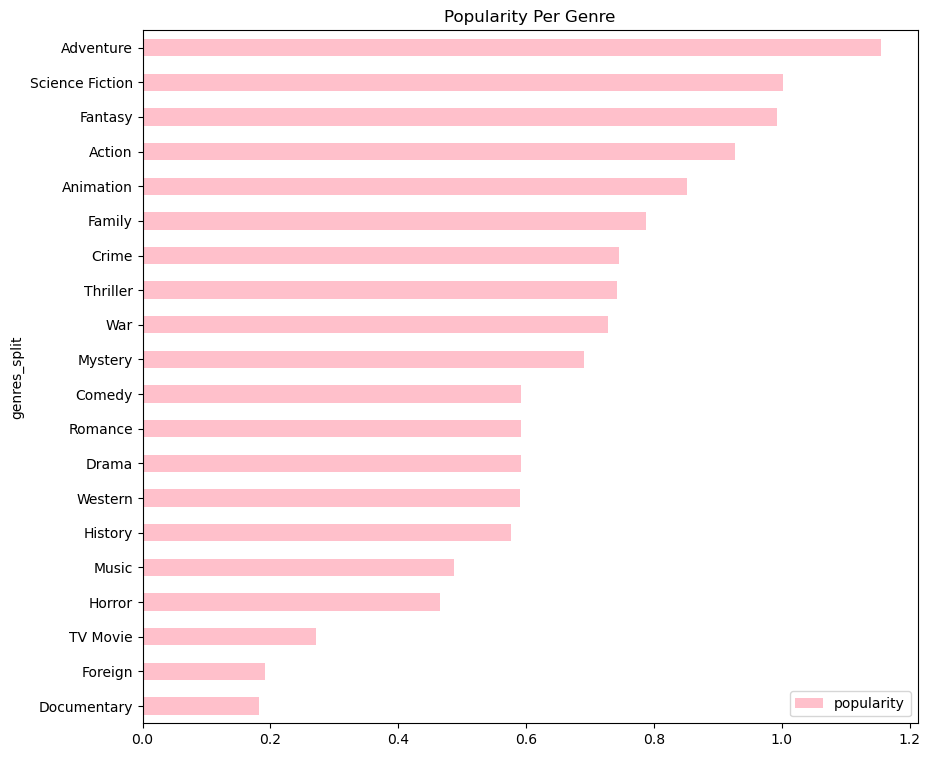

In [125]:
popularity_avg[["genres_split", "popularity"]].plot.barh(x="genres_split", title="Popularity Per Genre", color="Pink", figsize=(10, 9))

In [129]:
#5. Which genres have the highest number of movies with a voting avg. >= 8?

In [131]:
#We're only going to take into account movies that have at least 50 votes, so that we know that the average is reliable.

In [135]:
movies_genre.head(20)

,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,profit,genres_split
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.500000,1363528810,Action
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.500000,1363528810,Adventure
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.500000,1363528810,Science Fiction
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.500000,1363528810,Thriller
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,5/13/15,6185,7.100000,228436354,Action
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,5/13/15,6185,7.100000,228436354,Adventure
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,5/13/15,6185,7.100000,228436354,Science Fiction
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,5/13/15,6185,7.100000,228436354,Thriller
2,13.112507,110000000,295238201,Insurgent,119,3/18/15,2480,6.300000,185238201,Adventure
2,13.112507,110000000,295238201,Insurgent,119,3/18/15,2480,6.300000,185238201,Science Fiction


In [137]:
#list of movies that have at least 50 ratings and that have an average vote of over 8:
high_vote = movies_genre[(movies_genre["vote_count"] >= 50) & (movies_genre["vote_average"] >= 8)]
high_vote

,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,profit,genres_split
9,6.326804,175000000,853708609,Inside Out,94,6/9/15,3935,8.000000,678708609,Comedy
9,6.326804,175000000,853708609,Inside Out,94,6/9/15,3935,8.000000,678708609,Animation
9,6.326804,175000000,853708609,Inside Out,94,6/9/15,3935,8.000000,678708609,Family
35,3.557846,6000000,35401758,Room,117,10/16/15,1520,8.000000,29401758,Drama
35,3.557846,6000000,35401758,Room,117,10/16/15,1520,8.000000,29401758,Thriller
609,0.033378,0,0,The Jinx: The Life and Deaths of Robert Durst,240,2/8/15,72,8.400000,0,Documentary
629,24.949134,165000000,621752480,Interstellar,169,11/5/14,6498,8.000000,456752480,Adventure
629,24.949134,165000000,621752480,Interstellar,169,11/5/14,6498,8.000000,456752480,Drama
629,24.949134,165000000,621752480,Interstellar,169,11/5/14,6498,8.000000,456752480,Science Fiction
636,8.110711,14000000,233555708,The Imitation Game,113,11/14/14,3478,8.000000,219555708,History


In [140]:
#Number of ratings over 8 per genre:
best_rated_genres = high_vote.groupby("genres_split")["original_title"].nunique().sort_values(ascending = True)
best_rated_genres

genres_split
Mystery             1
Horror              1
Fantasy             2
Music               2
History             2
Science Fiction     3
Romance             3
Action              3
Comedy              3
War                 3
Adventure           4
Animation           5
Family              5
Thriller            6
Documentary         7
Crime              10
Drama              21
Name: original_title, dtype: int64

In [142]:
best_rated_genres = best_rated_genres.reset_index()

In [144]:
best_rated_genres

,genres_split,original_title
0,Mystery,1
1,Horror,1
2,Fantasy,2
3,Music,2
4,History,2
5,Science Fiction,3
6,Romance,3
7,Action,3
8,Comedy,3
9,War,3


<Axes: title={'center': 'Average Vote Per Genre'}, ylabel='genres_split'>

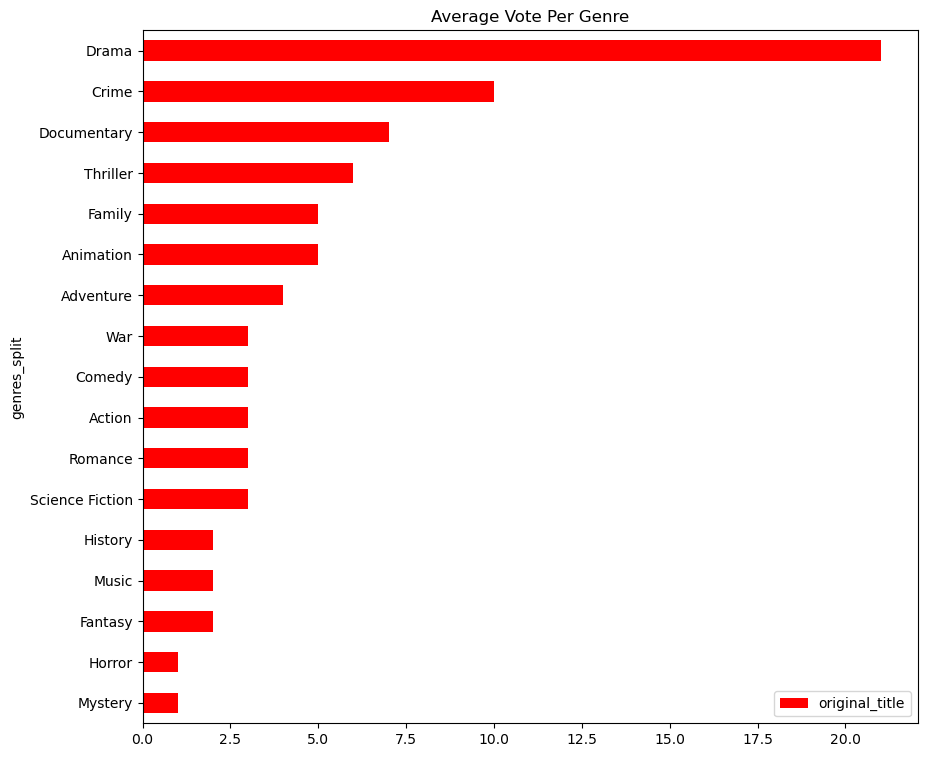

In [146]:
#Visualization:
best_rated_genres.plot.barh(x="genres_split", y="original_title", title="Average Vote Per Genre", color="Red", figsize=(10, 9))

In [151]:
#We need to go back to having only one line per movie:
movies.drop_duplicates(inplace = True)
movies["profit"] = movies["revenue"] - movies["budget"]
movies_genre = movies[["popularity","budget","revenue", "original_title","runtime","genres","release_date","vote_count","vote_average","profit"]]

In [155]:
movies_genre.head(10)

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,profit
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.500000,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.100000,228436354
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.300000,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.500000,1868178225
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.300000,1316249360
5,9.110700,135000000,532950503,The Revenant,156,Western|Drama|Adventure|Thriller,12/25/15,3929,7.200000,397950503
6,8.654359,155000000,440603537,Terminator Genisys,125,Science Fiction|Action|Thriller|Adventure,6/23/15,2598,5.800000,285603537
7,7.667400,108000000,595380321,The Martian,141,Drama|Adventure|Science Fiction,9/30/15,4572,7.600000,487380321
8,7.404165,74000000,1156730962,Minions,91,Family|Animation|Adventure|Comedy,6/17/15,2893,6.500000,1082730962
9,6.326804,175000000,853708609,Inside Out,94,Comedy|Animation|Family,6/9/15,3935,8.000000,678708609


In [174]:
#Hypothesis 1: The best movies according to vote avg. return high profit.

In [176]:
#Once again, we're only taking into account movies that have at least 50 votes.
many_ratings = movies_genre[movies_genre["vote_count"] >= 50]
many_ratings.corr(method = "spearman", numeric_only=True)

,popularity,budget,revenue,runtime,vote_count,vote_average,profit
popularity,1.000000,0.484952,0.588594,0.230214,0.768888,0.189226,0.498092
budget,0.484952,1.000000,0.714733,0.360001,0.554412,-0.044050,0.334345
revenue,0.588594,0.714733,1.000000,0.341469,0.682550,0.112201,0.842278
runtime,0.230214,0.360001,0.341469,1.000000,0.263164,0.286082,0.211947
vote_count,0.768888,0.554412,0.682550,0.263164,1.000000,0.285084,0.583606
vote_average,0.189226,-0.044050,0.112201,0.286082,0.285084,1.000000,0.198580
profit,0.498092,0.334345,0.842278,0.211947,0.583606,0.198580,1.000000


<Axes: xlabel='vote_average', ylabel='profit'>

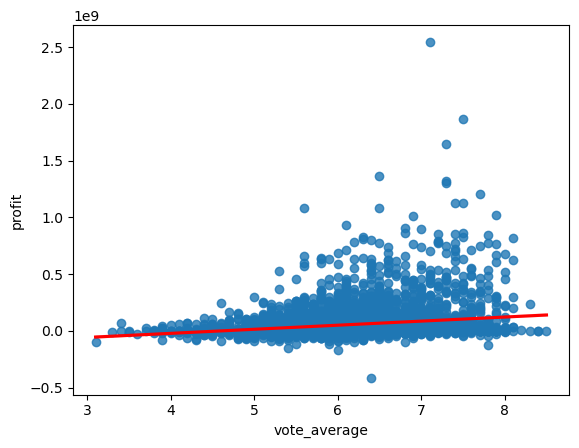

In [178]:
#Let's visualize it:
import seaborn as sns
sns.regplot( many_ratings, x = "vote_average", y = "profit", line_kws = {"color": "red"})

In [179]:
#the correlation is really small. The hypothesis is wrong.

In [183]:
#Hypothesis 2: The best movies according to popularity return high profit.

In [185]:
movies_genre.corr(method = "spearman", numeric_only=True)

,popularity,budget,revenue,runtime,vote_count,vote_average,profit
popularity,1.000000,0.567488,0.618896,0.244339,0.779844,0.153919,0.373144
budget,0.567488,1.000000,0.707584,0.312480,0.610482,0.067291,0.128382
revenue,0.618896,0.707584,1.000000,0.329214,0.682130,0.187628,0.659200
runtime,0.244339,0.312480,0.329214,1.000000,0.246621,0.250163,0.162361
vote_count,0.779844,0.610482,0.682130,0.246621,1.000000,0.272168,0.425216
vote_average,0.153919,0.067291,0.187628,0.250163,0.272168,1.000000,0.227223
profit,0.373144,0.128382,0.659200,0.162361,0.425216,0.227223,1.000000


<Axes: xlabel='popularity', ylabel='profit'>

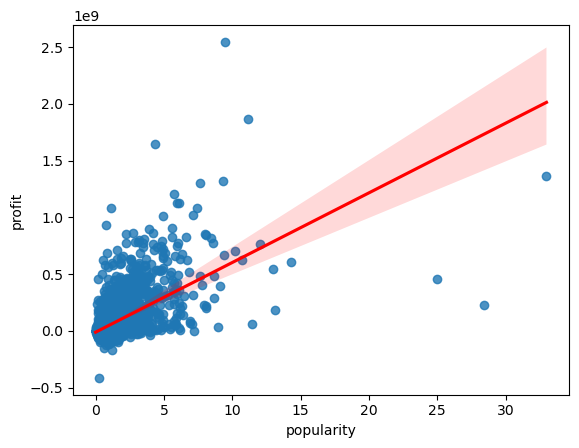

In [187]:
#Visualization:
sns.regplot( many_ratings, x = "popularity", y = "profit", line_kws = {"color": "red"})

In [189]:
#The correlation is really high. The hypothesis is right.

In [191]:
#Hypothesis 3: Highly budgeted movies return high profit.

In [193]:
movies_genre.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,profit
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.500000,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.100000,228436354
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.300000,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.500000,1868178225
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.300000,1316249360


<Axes: xlabel='budget', ylabel='profit'>

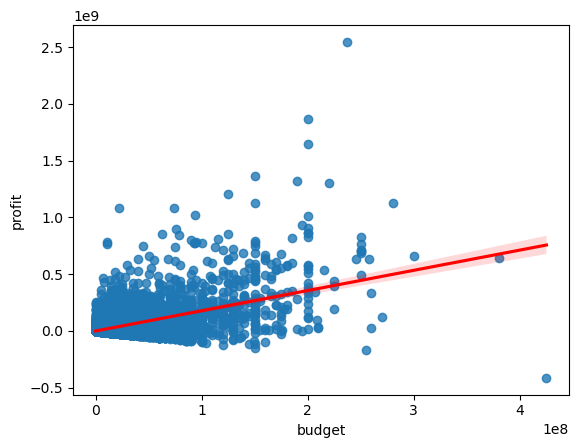

In [195]:
sns.regplot( movies_genre, x= "budget", y = "profit", line_kws = {"color": "red"})

In [164]:
#The correlation is rather high. The hypothesis is right.

In [197]:
#Hypothesis 4: Highly budgeted movies have a high popularity.

<Axes: xlabel='budget', ylabel='popularity'>

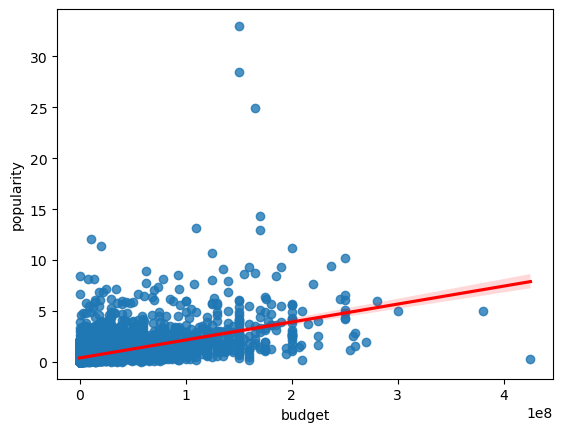

In [199]:
sns.regplot( movies_genre, x= "budget", y = "popularity", line_kws = {"color": "red"})

In [201]:
#The correlation is rather high. The hypothesis is right.

In [207]:
#Bonus Question:
#1. Take a look at the profit per genre per year, to see if there's an evolution over the years.

In [222]:
#let's replace the date by the release year to make it easier:
movies_genre = movies[["popularity","budget","revenue", "original_title","runtime","genres","release_year","vote_count","vote_average","profit"]]

In [224]:
movies_genre.head(10)

,popularity,budget,revenue,original_title,runtime,genres,release_year,vote_count,vote_average,profit
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015,5562,6.500000,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015,6185,7.100000,228436354
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2015,2480,6.300000,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,2015,5292,7.500000,1868178225
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2015,2947,7.300000,1316249360
5,9.110700,135000000,532950503,The Revenant,156,Western|Drama|Adventure|Thriller,2015,3929,7.200000,397950503
6,8.654359,155000000,440603537,Terminator Genisys,125,Science Fiction|Action|Thriller|Adventure,2015,2598,5.800000,285603537
7,7.667400,108000000,595380321,The Martian,141,Drama|Adventure|Science Fiction,2015,4572,7.600000,487380321
8,7.404165,74000000,1156730962,Minions,91,Family|Animation|Adventure|Comedy,2015,2893,6.500000,1082730962
9,6.326804,175000000,853708609,Inside Out,94,Comedy|Animation|Family,2015,3935,8.000000,678708609


In [227]:
#For this question, we need to split the genres again:
split.name = "genres_split"
del movies_genre["genres"]
movies_genre = movies_genre.join(split)

In [230]:
#Average profit grouped by release year and by genre
time_genre = movies_genre.groupby(["release_year","genres_split"])["profit"].mean()
time_genre.head(20)

release_year  genres_split   
1960          Action              6363125.000000
              Adventure            431000.000000
              Comedy              5258750.000000
              Crime                     0.000000
              Drama               8245619.384615
              Family              3333333.333333
              Fantasy             -375000.000000
              Foreign                   0.000000
              History             9600000.000000
              Horror              4389007.428571
              Music                     0.000000
              Romance             5225000.000000
              Science Fiction     -316666.666667
              Thriller            5028842.000000
              War                       0.000000
              Western              484166.666667
1961          Action              2457142.857143
              Adventure          39130002.333333
              Animation         211880014.000000
              Comedy             221980

In [235]:
time_genre = time_genre.reset_index()
time_genre.head(20)

,release_year,genres_split,profit
0,1960,Action,6363125.000000
1,1960,Adventure,431000.000000
2,1960,Comedy,5258750.000000
3,1960,Crime,0.000000
4,1960,Drama,8245619.384615
5,1960,Family,3333333.333333
6,1960,Fantasy,-375000.000000
7,1960,Foreign,0.000000
8,1960,History,9600000.000000
9,1960,Horror,4389007.428571


In [238]:
#Let's pivot the table:
final_time_genre = pd.pivot_table(time_genre, values = "profit", index = ["genres_split"], columns = ["release_year"])
final_time_genre.head(20)

release_year,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
genres_split,,,,,,,,,,,,,,,,,,,,,,,
Action,6363125.000000,2457142.857143,10437500.000000,14999691.250000,24280000.000000,16104504.777778,324785.714286,21732786.428571,8868478.833333,5861449.300000,7735913.454545,...,32379154.185714,38048623.212500,45977444.052632,47642764.404040,57555510.740741,34571030.355140,51968078.252174,71910257.424242,47431725.628099,69943650.015504,90399046.747664
Adventure,431000.000000,39130002.333333,21214285.714286,9428395.000000,24123400.000000,25124276.333333,791563.636364,49281873.857143,15122159.400000,16651809.400000,11406377.666667,...,70756754.320755,64895200.090909,83916731.083333,55016526.809524,113364919.736111,98125646.677966,113343224.564516,162549574.300000,100638113.402985,120373306.985075,144787868.971014
Animation,NaN,211880014.000000,NaN,0.000000,0.000000,0.000000,-105000.000000,100921706.000000,0.000000,0.000000,25837628.500000,...,40307312.153846,39047734.974359,67147670.531250,51907242.575758,48862898.250000,58455658.640000,63420098.934783,69231546.875000,93718795.261905,64313463.250000,83691174.384615
Comedy,5258750.000000,22198001.400000,1599974.800000,765591.923077,7080111.375000,3264285.714286,-149550.000000,10135087.470588,-1277777.777778,-125000.000000,11901488.583333,...,22147617.440559,24944308.174194,30674848.549669,21483012.426036,24741982.808081,23154807.875740,27241358.720930,25631999.136364,25068455.091429,26648786.864865,33703819.067901
Crime,0.000000,18828411.000000,3709948.666667,369526.750000,1723307.300000,-22500.000000,-275560.000000,12899678.714286,6762174.600000,31482963.000000,-2125000.000000,...,15680793.688889,21551432.962264,16700048.400000,31258696.854839,11016642.307692,13490412.320000,25395271.625000,29522925.555556,23248589.507042,5903014.230769,61286524.372549
Documentary,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,...,316012.705882,6772940.000000,5229344.631579,321262.230769,-1603933.560000,187417.771429,2567196.816327,1102306.591837,321880.225806,13104.136986,531061.859649
Drama,8245619.384615,4912698.375000,4373796.190476,1587307.692308,3726105.550000,11933809.800000,1014793.062500,18045095.000000,6354859.150000,10317995.538462,19753262.842105,...,17180823.510989,12994800.142132,13953425.421320,16736384.017167,15209056.888393,13510589.176190,10830976.523364,23418944.870690,13344942.608696,13697098.665493,16315310.438462
Family,3333333.333333,42576002.800000,4000000.000000,-333333.333333,37818181.750000,51671428.666667,-341828.571429,64281204.000000,-640000.000000,0.000000,17225085.666667,...,51714774.929825,35281751.276923,80470561.733333,44483026.142857,62009322.100000,98999767.490909,65483435.472222,69321493.023810,89321956.437500,56295182.744186,85974520.750000
Fantasy,-375000.000000,0.000000,-126.000000,-500000.000000,24068181.750000,NaN,0.000000,-3000000.000000,-2000000.000000,0.000000,0.000000,...,64388182.000000,57967661.441176,93461583.425532,51441997.767442,96235822.102041,83235328.522727,94486677.847826,122245621.970588,79363628.000000,112966482.638889,86576948.303030


Text(0.5, 1.0, 'Genres by Profit per Year')

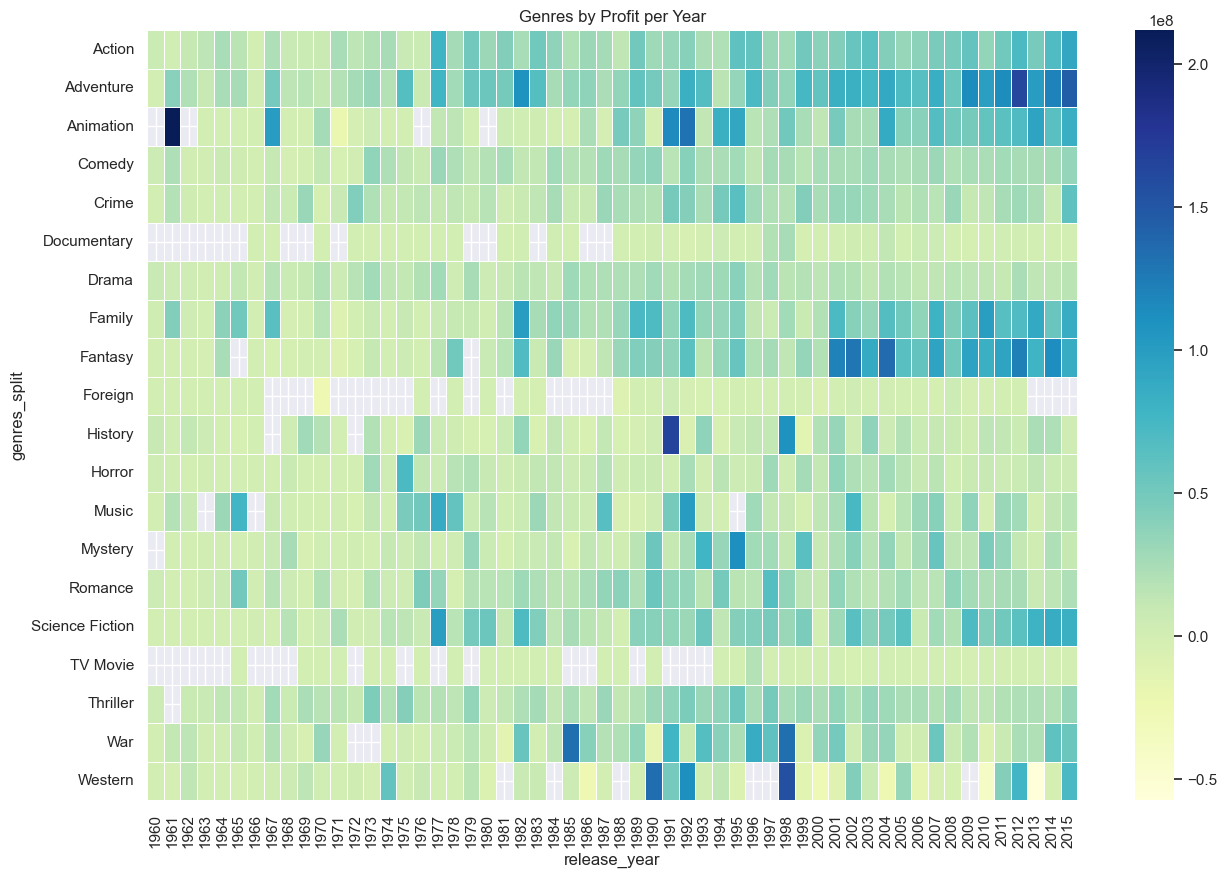

In [241]:
#Let's visualize it with a heatmap:
import matplotlib.pyplot as plt
sns.set(rc = {"figure.figsize": (15,10)})
sns.heatmap(final_time_genre, cmap = "YlGnBu", linewidths = .5)
plt.title("Genres by Profit per Year")